In [ ]:
# Data Analytics II
# 1. Implement logistic regression using Python/R to perform classification on
# Social_Network_Ads.csv dataset.
# 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
# the given dataset

In [94]:
import pandas as pd #used for handling dataframes
import numpy as np #used for numerical operations like arrays, math, etc.
import seaborn as sns # a statistical data visualization library
import matplotlib.pyplot as plt #used for creating plots and graphs.
from sklearn.model_selection import train_test_split #Used to split your dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression # Imports Logistic Regression model used for classification problems.
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score #confusion_matrix Shows prediction vs actual classes

In [95]:
df = pd.read_csv("C:/Users/Manish/Downloads/Social_Network_Ads.csv")

In [96]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [97]:
df['Gender'].replace({"Male":0,"Female":1},inplace=True)
#replaces categorical values in the 'Gender' column with numeric values Male-0 Female-1
#inplace=True means changes are made directly in DataFrame without creating a new copy.

C:\Users\Manish\AppData\Local\Temp\ipykernel_48676\1019271900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({"Male":0,"Female":1},inplace=True)
C:\Users\Manish\AppData\Local\Temp\ipykernel_48676\1019271900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

In [98]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [99]:
df.columns #command returns a list of all column names in DataFrame df.

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [100]:
x = df[['User ID', 'Gender', 'Age', 'EstimatedSalary']]#x = Features (inputs to the model)
y = df['Purchased']#y = Label/output (what you want to predict)

In [101]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [102]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=29)
#x_train, y_train: 75% of the data used to train the model
# x_test, y_test: 25% of the data used to test the model
# test_size=0.25: 25% of data for testing
# random_state=29: Ensures the split is reproducible (same every time)

In [104]:
model = LogisticRegression() #This creates a Logistic Regression model object.
model.fit(x_train,y_train) #trains model using training datax_train Input feature,y_train Target values

LogisticRegression()

In [105]:
y_pred = model.predict(x_test)
# This line uses trained logistic regression model to make predictions on test data (x_test).
#y_pred will contain predicted values (like 0 or 1 for classification tasks) for each input in x_test.

In [106]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [107]:
model.score(x_train,y_train) #This line evaluates the accuracy of trained model on training data

0.8633333333333333

In [108]:
model.score(x,y) # This line evaluates accuracy of trained model on entire dataset

0.85

In [109]:
from sklearn.metrics import confusion_matrix #This imports confusion_matrix function

cm = confusion_matrix(y_test, y_pred) #calculates confusion matrix using actual labels (y_test) & predicted labels (y_pred).
cm

array([[63,  6],
       [13, 18]])

In [110]:
print(confusion_matrix.__doc__)
#command prints the documentation (docstring) for the confusion_matrix function.
#docstring provides a detailed description of what function does,its parameters,& what it returns.

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If ``None`` is given, those that appear at least once
    in ``y_true`` or ``y_pred`` are used in sorted order.

sample_weight : array-l

In [111]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#.ravel() method is used to convert 2x2 confusion matrix into 1D array with these four values.

In [112]:
print(tn, fp, fn, tp)

63 6 13 18


In [113]:
accuracy = accuracy_score(y_test, y_pred)
#calculates accuracy of model by comparing actual values (y_test) with predicted values (y_pred)
accuracy
#Accuracy= Number of Correct Predictions/Total Predictions

0.81

In [114]:
error_rate = 1 - accuracy
#calculates the error rate, which is the proportion of incorrect predictions made by the model.
error_rate

0.18999999999999995

In [115]:
precision = precision_score(y_test, y_pred)
#Precision tells you what fraction of predicted positives were actually correct
#Precision= (TP)/(TP + FP)
precision

0.75

In [116]:
recall = recall_score(y_test, y_pred)
#This calculates the recall (also called sensitivity or true positive rate) of the model.
#Recall = (TP)/(TP+FN)
recall

0.5806451612903226

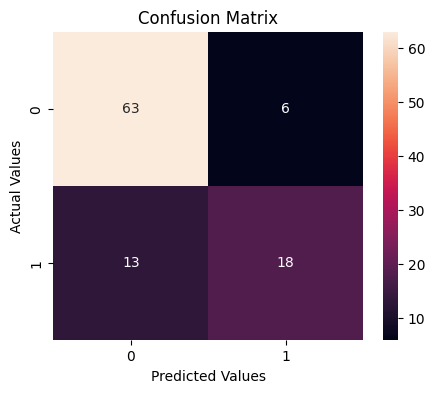

In [117]:
plt.figure(figsize=(5,4)) #sets the size of the plot.
sns.heatmap(cm, annot=True) #draws the heatmap with numbers shown (annot=True).
plt.title('Confusion Matrix') #sets the title of the plot.
plt.ylabel('Actual Values') #label the axes for clarity.
plt.xlabel('Predicted Values') #label the axes for clarity.
plt.show() # displays the plot.

In [118]:
precision_score.__doc__
#displays the documentation (docstring) for the precision_score function in scikit-learn.

'Compute the precision.\n\nThe precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of\ntrue positives and ``fp`` the number of false positives. The precision is\nintuitively the ability of the classifier not to label as positive a sample\nthat is negative.\n\nThe best value is 1 and the worst value is 0.\n\nSupport beyond term:`binary` targets is achieved by treating :term:`multiclass`\nand :term:`multilabel` data as a collection of binary problems, one for each\nlabel. For the :term:`binary` case, setting `average=\'binary\'` will return\nprecision for `pos_label`. If `average` is not `\'binary\'`, `pos_label` is ignored\nand precision for both classes are computed, then averaged or both returned (when\n`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,\nprecision for all `labels` are either returned or averaged depending on the\n`average` parameter. Use `labels` specify the set of labels to calculate precision\nfor.\n\nRead more in the